### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Prof**: Samuel Martins (Samuka) <br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

#### Custom CSS style

In [1]:
%%html
<style>
.dashed-box {
    border: 1px dashed black !important;
#    font-size: var(--jp-content-font-size1) !important;
}

.dashed-box table {

}

.dashed-box tr {
    background-color: white !important;
}
        
.alt-tab {
    background-color: black;
    color: #ffc351;
    padding: 4px;
    font-size: 1em;
    font-weight: bold;
    font-family: monospace;
}
// add your CSS styling here
</style>

<span style='font-size: 2.5em'><b>California Housing 🏡</b></span><br/>
<span style='font-size: 1.5em'>Predict the median housing price in California districts</span>

<span style="background-color: #ffc351; padding: 4px; font-size: 1em;"><b>Sprint #1</b></span>

<img src="./imgs/california-flag.png" width=300/>

---



## Before starting this notebook
This jupyter notebook is designed for **experimental and teaching purposes**. <br/>
Although it is (relatively) well organized, it aims at solving the _target problem_ by evaluating (and documenting) _different solutions_ for somes steps of the **machine learning pipeline** — see the ***Machine Learning Project Checklist by xavecoding***. <br/>
We tried to make this notebook as literally a _notebook_. Thus, it contains notes, drafts, comments, etc.<br/>

For teaching purposes, some parts of the notebook may be _overcommented_. Moreover, to simulate a real development scenario, we will divide our solution and experiments into **"sprints"** in which each sprint has some goals (e.g., perform _feature selection_, train more ML models, ...). <br/>
The **sprint goal** will be stated at the beginning of the notebook.

A ***final notebook*** (or any other kind of presentation) that compiles and summarizes all sprints — the target problem, solutions, and findings — should be created later.

#### Conventions

<ul>
    <li>💡 indicates a tip. </li>
    <li> ⚠️ indicates a warning message. </li>
    <li><span class='alt-tab'>alt tab</span> indicates and an extra content (<i>e.g.</i>, slides) to explain a given concept.</li>
</ul>

---

## 🎯 Sprint Goals
- Frame the problem
- Get the data
- Data cleaning
- Simple EDA to gain insights
- Initial data preprocessing
- Train a (single) ML algorithm with all features and default hyperparameters
---

### 0. Imports and default settings for plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
import pandas as pd

housing = pd.read_csv('./datasets/housing.csv')

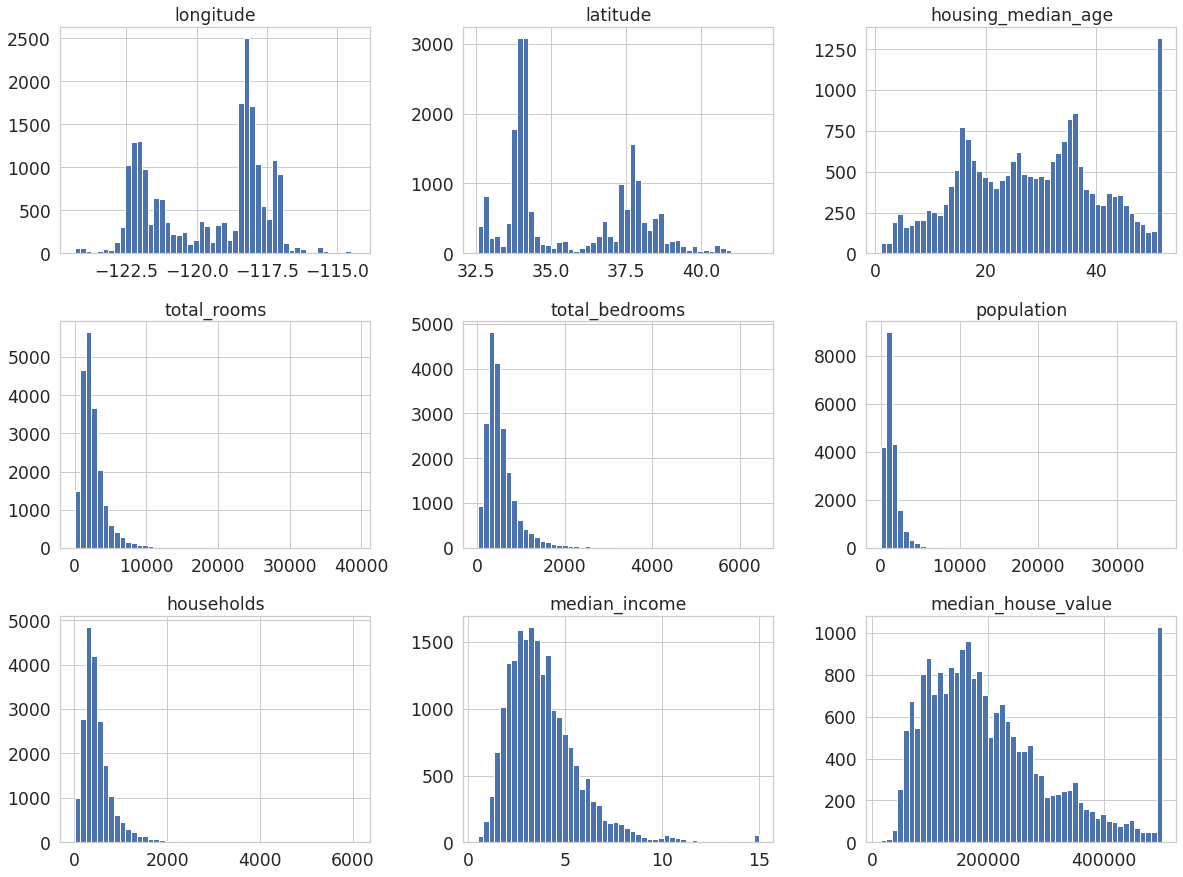

In [4]:
# plot a histogram for each numeric attibute from the dataframe
housing.hist(bins=50, figsize=(20,15))
display()  # just to avoid texts in the notebook output

In [5]:
housing['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [6]:
mask = housing['housing_median_age'] > 37
housing.loc[mask, 'housing_median_age'].value_counts()

52.0    1273
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
41.0     296
45.0     294
46.0     245
47.0     198
48.0     177
50.0     136
49.0     134
51.0      48
Name: housing_median_age, dtype: int64

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

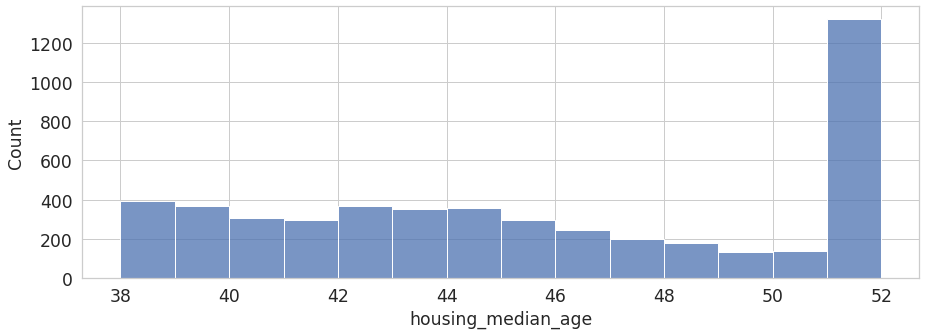

In [7]:
sns.histplot(data=housing[mask], x='housing_median_age')

In [8]:
housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [9]:
mask = housing['median_house_value'] > 450000
housing.loc[mask, 'median_house_value'].value_counts()

500001.0    965
500000.0     27
475000.0      8
483300.0      6
466700.0      4
           ... 
483100.0      1
476300.0      1
466400.0      1
465000.0      1
486900.0      1
Name: median_house_value, Length: 188, dtype: int64

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

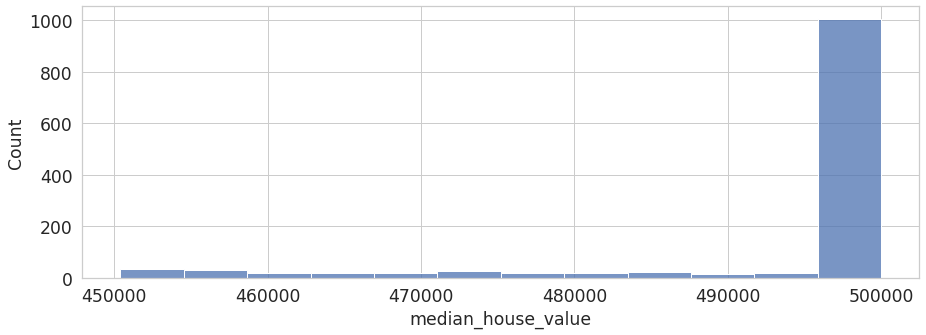

In [10]:
sns.histplot(data=housing[mask], x='median_house_value')

In [11]:
housing_raw = housing.copy()

In [13]:
# removing outliers by house age
no_outlier_mask = (housing['housing_median_age'] < 52) & (housing['median_house_value'] < 500001)
housing = housing[no_outlier_mask].copy()
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
8        -122.26     37.84                42.0       2555.0           665.0   
15       -122.26     37.85                50.0       1120.0           283.0   
18       -122.26     37.84                50.0       2239.0           455.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
8          1206.0       595.0         2.0804            226700.0   
15          697.0       264.0         2.1250            140000.0   
18          990.0       419.0         1.9911            158700.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
8            NEAR BAY  
15           NEAR BAY  
18           NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[18572 rows x 10 columns]

### Segmenting samples by their `median income`

We will follow the premise from the book that "the _median income_ is a very important attribute to predict _median housing prices_". So, we need to guarantee that training and testing set are _representative_ for that, otherwise we will have ***bias selection***. <br/>
One way to do that is _to group_ the samples according to their _median income_ and perform a **stratified sampling**.

Since we do not have a categorical variable for the _median income_, we can segment the samples by creating groups (_strata_) according to ranges of _median incomes_. <br/>
Let's then check the distribution of the _median income_ to decide the upper and lower bounds of each group.

<AxesSubplot:xlabel='median_income', ylabel='Count'>

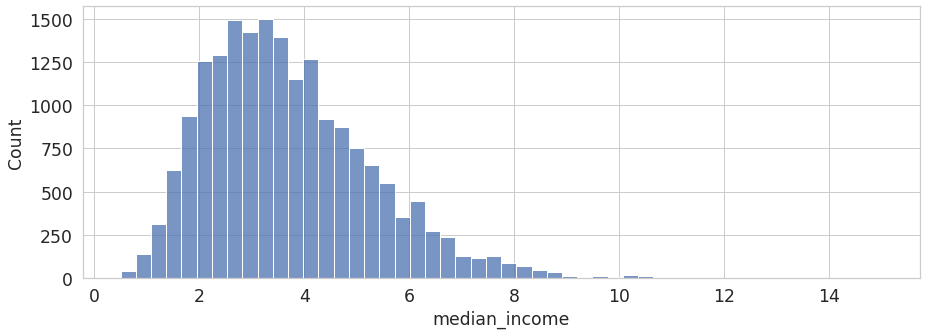

In [14]:
sns.histplot(data=housing, x='median_income', bins=50)

Most median income values are clustered around 1.5 to 6 (i.e., \\$15,000 - \\$60,000), but some median incomes go far beyond 6.

It is important to have a _sufficient number of instances_ in your dataset for each group (_stratum_), or else the estimate of a stratum’s importance may be biased. <br/>
This means that you **should not have too many strata**, and **each stratum should be *large enough***.

We follow the book and consider five intervals to group the samples:
- Group 1: [0, 1.5]
- Group 2: (1.5, 3]
- Group 3: (3, 4.5]
- Group 3: (4.5, 6]
- Group 4: (6, +inf]

In [15]:
housing['median_income_group'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5], include_lowest=True)
housing['median_income_group']

0        5
1        5
8        2
15       2
18       2
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: median_income_group, Length: 18572, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [16]:
housing['median_income_group'].value_counts()

3    6660
2    6163
4    3373
5    1641
1     735
Name: median_income_group, dtype: int64

In [17]:
# proportional of the groups in the entire dataset
housing['median_income_group'].value_counts() / len(housing['median_income_group'])

3    0.358604
2    0.331844
4    0.181617
5    0.088359
1    0.039576
Name: median_income_group, dtype: float64

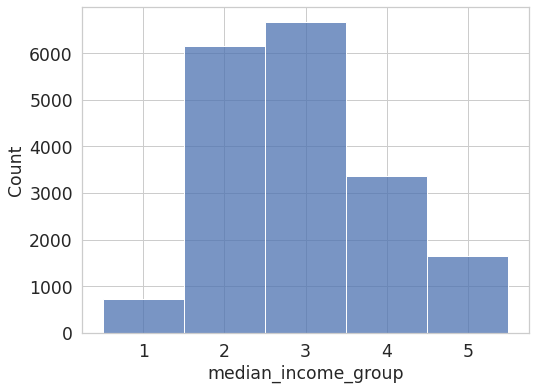

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(housing['median_income_group'])
plt.grid(True)

### Stratified Sampling

In [19]:
from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(housing, test_size=0.2, stratify=housing['median_income_group'], random_state=42)

In [20]:
housing_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18502    -121.37     37.06                25.0        474.0            92.0   
4102     -118.39     34.14                19.0       5076.0          1034.0   
18219    -122.07     37.41                26.0       1184.0           225.0   
9797     -121.92     36.57                42.0       3944.0           738.0   
8752     -118.36     33.82                36.0       1083.0           187.0   

       population  households  median_income  median_house_value  \
18502       300.0       104.0         3.8062            340900.0   
4102       2021.0       960.0         5.5683            309200.0   
18219       815.0       218.0         5.7657            322300.0   
9797       1374.0       598.0         4.1740            394400.0   
8752        522.0       187.0         5.7765            339500.0   

      ocean_proximity median_income_group  
18502          INLAND                   3  
4102        <1H OCEAN                   4  
18219        NEAR BAY                   4  
9797       NEAR OCEAN                   3  
8752        <1H OCEAN                   4

In [21]:
housing_train.shape

(14857, 11)

In [22]:
# proportion of the groups in the training set
housing_train['median_income_group'].value_counts() / len(housing_train['median_income_group'])

3    0.358619
2    0.331830
4    0.181598
5    0.088376
1    0.039577
Name: median_income_group, dtype: float64

In [23]:
housing_test.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4922    -118.25     34.00                41.0       1768.0           475.0   
7299    -118.20     33.99                35.0       1705.0           523.0   
1145    -121.39     39.61                22.0       2828.0           610.0   
5452    -118.46     34.00                39.0       4098.0          1100.0   
9995    -121.03     39.14                10.0       3138.0           524.0   

      population  households  median_income  median_house_value  \
4922      1721.0       474.0         1.3030             90400.0   
7299      2252.0       508.0         2.3421            154200.0   
1145       986.0       391.0         2.8871             94700.0   
5452      2054.0      1053.0         2.9180            345600.0   
9995      1275.0       511.0         4.0775            164500.0   

     ocean_proximity median_income_group  
4922       <1H OCEAN                   1  
7299       <1H OCEAN                   2  
1145          INLAND                   2  
5452       <1H OCEAN                   2  
9995          INLAND                   3

In [24]:
housing_test.shape

(3715, 11)

In [25]:
# proportion of the groups in the testing set
housing_test['median_income_group'].value_counts() / len(housing_test['median_income_group'])

3    0.358546
2    0.331898
4    0.181696
5    0.088291
1    0.039569
Name: median_income_group, dtype: float64

In [26]:
# removing the attribute 'median_income_group'
housing_train = housing_train.drop(columns=['median_income_group'])
housing_test = housing_test.drop(columns=['median_income_group'])

#### **Saving datasets**

In [27]:
# if you want to keep the reference for the row indices from the original dataset, remove the index=False
housing_train.to_csv('./datasets/housing_train.csv', index=False)
housing_test.to_csv('./datasets/housing_test.csv', index=False)

Comment about view/copy in train_test_split

## 🧹 3. Data Cleaning

### 3.1. Missing values

We checked earlier that the `total_bedrooms` attribute has some missing values, so let’s fix this. You have three options:
    
1. Get rid of the corresponding districts. <br/>
<code>housing_train.dropna(subset=["total_bedrooms"])</code>

2. Get rid of the whole attribute. <br/>
<code>housing_train.drop("total_bedrooms", axis=1)</code>

3. Set the values to some value (zero, the mean, the median, etc.). <br/>
<code>median_total_bedrooms = housing_train["total_bedrooms"].median()
housing_train["total_bedrooms"].fillna(median_total_bedrooms, inplace=True)
</code>

To avoid dropping the samples with missing `total_bedrooms`, we will choose *option 3*.

The ***median*** is almost always a good choice since it is not sensitive to outliers. <br/>
However, let us see the distribution of the `total_bedrooms` first.

<AxesSubplot:xlabel='total_bedrooms'>

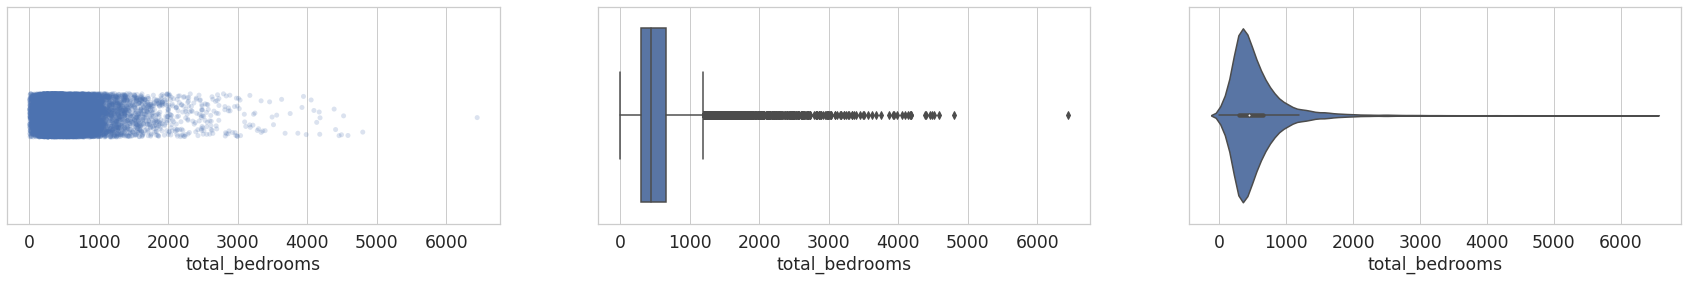

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(30, 4))

sns.stripplot(data=housing_train, x='total_bedrooms', ax=axes[0], alpha=0.2)
sns.boxplot(data=housing_train, x='total_bedrooms', ax=axes[1])
sns.violinplot(data=housing_train, x='total_bedrooms', ax=axes[2])

In [29]:
housing_train_pre = housing_train.copy()

median_total_bedrooms = housing_train_pre["total_bedrooms"].median()
housing_train_pre["total_bedrooms"].fillna(median_total_bedrooms, inplace=True)

In [30]:
housing_train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14857 entries, 18502 to 13540
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14857 non-null  float64
 1   latitude            14857 non-null  float64
 2   housing_median_age  14857 non-null  float64
 3   total_rooms         14857 non-null  float64
 4   total_bedrooms      14857 non-null  float64
 5   population          14857 non-null  float64
 6   households          14857 non-null  float64
 7   median_income       14857 non-null  float64
 8   median_house_value  14857 non-null  float64
 9   ocean_proximity     14857 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


### 4.1. Visualizing Geographical Data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

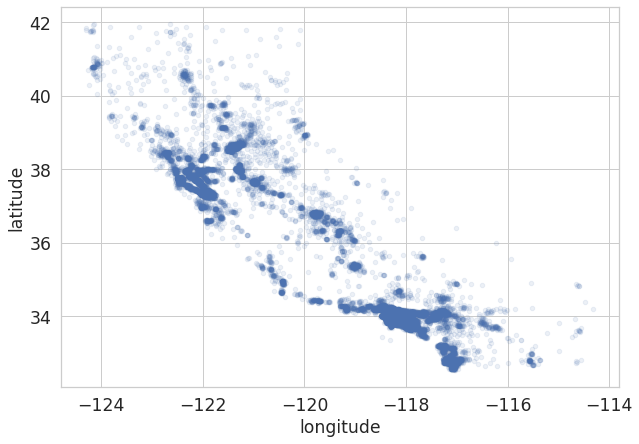

In [31]:
housing_train_pre.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(10, 7))

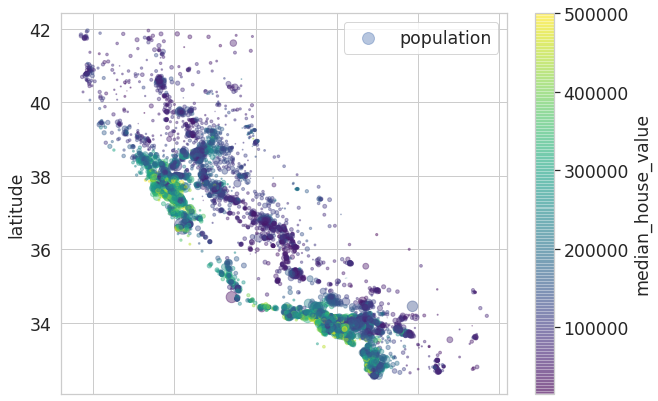

In [32]:
housing_train_pre.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing_train_pre["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("viridis"), colorbar=True)
plt.xlabel('longitude')
plt.legend()

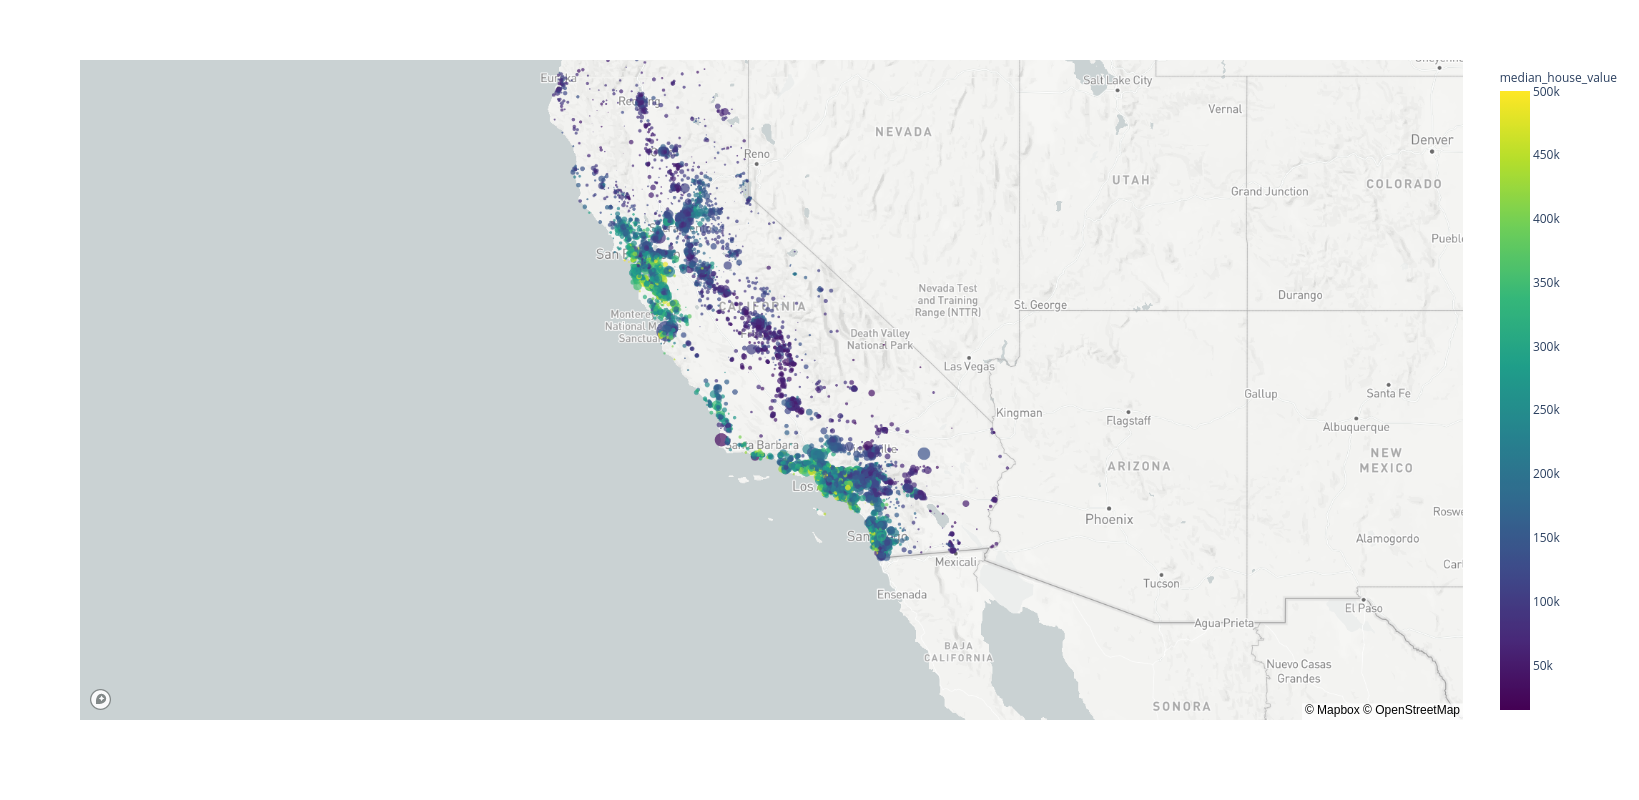

In [33]:
### To install plotly
# pip install plotly
# jupyter labextension install jupyterlab-plotly

### Plotly Maps
# https://plotly.com/python/scattermapbox/
# To plot on Mapbox maps with Plotly you may need a Mapbox account and a public Mapbox Access Token - https://www.mapbox.com/studio

import plotly.express as px

px.set_mapbox_access_token('pk.eyJ1IjoiY2llbmNpYWRlZGFkb3NpZnNwY2FtcGluYXMiLCJhIjoiY2tzcW9sNTRhMGR2bzJ1cGcxNTI1bWppdiJ9.4TJwkUhuLIt-2nH0YudsMg')
fig = px.scatter_mapbox(housing_train_pre, lat="latitude", lon="longitude", color="median_house_value", size="population",
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=5, width=1000, height=800)
fig.show()

Some (obvious) findings:
- There small and big districts (in term of population) close and far from the coast
- The most expensive houses are very close to the coast

### 4.2. Looking for Correlations
The **correlation coefficient** measures the _linear correlation_ between two variables. It ranges from –1 (perfect negative correlation)  to 1 (perfect positive correlation).

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2560px-Correlation_examples2.svg.png' width=800>

Source: https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2560px-Correlation_examples2.svg.png

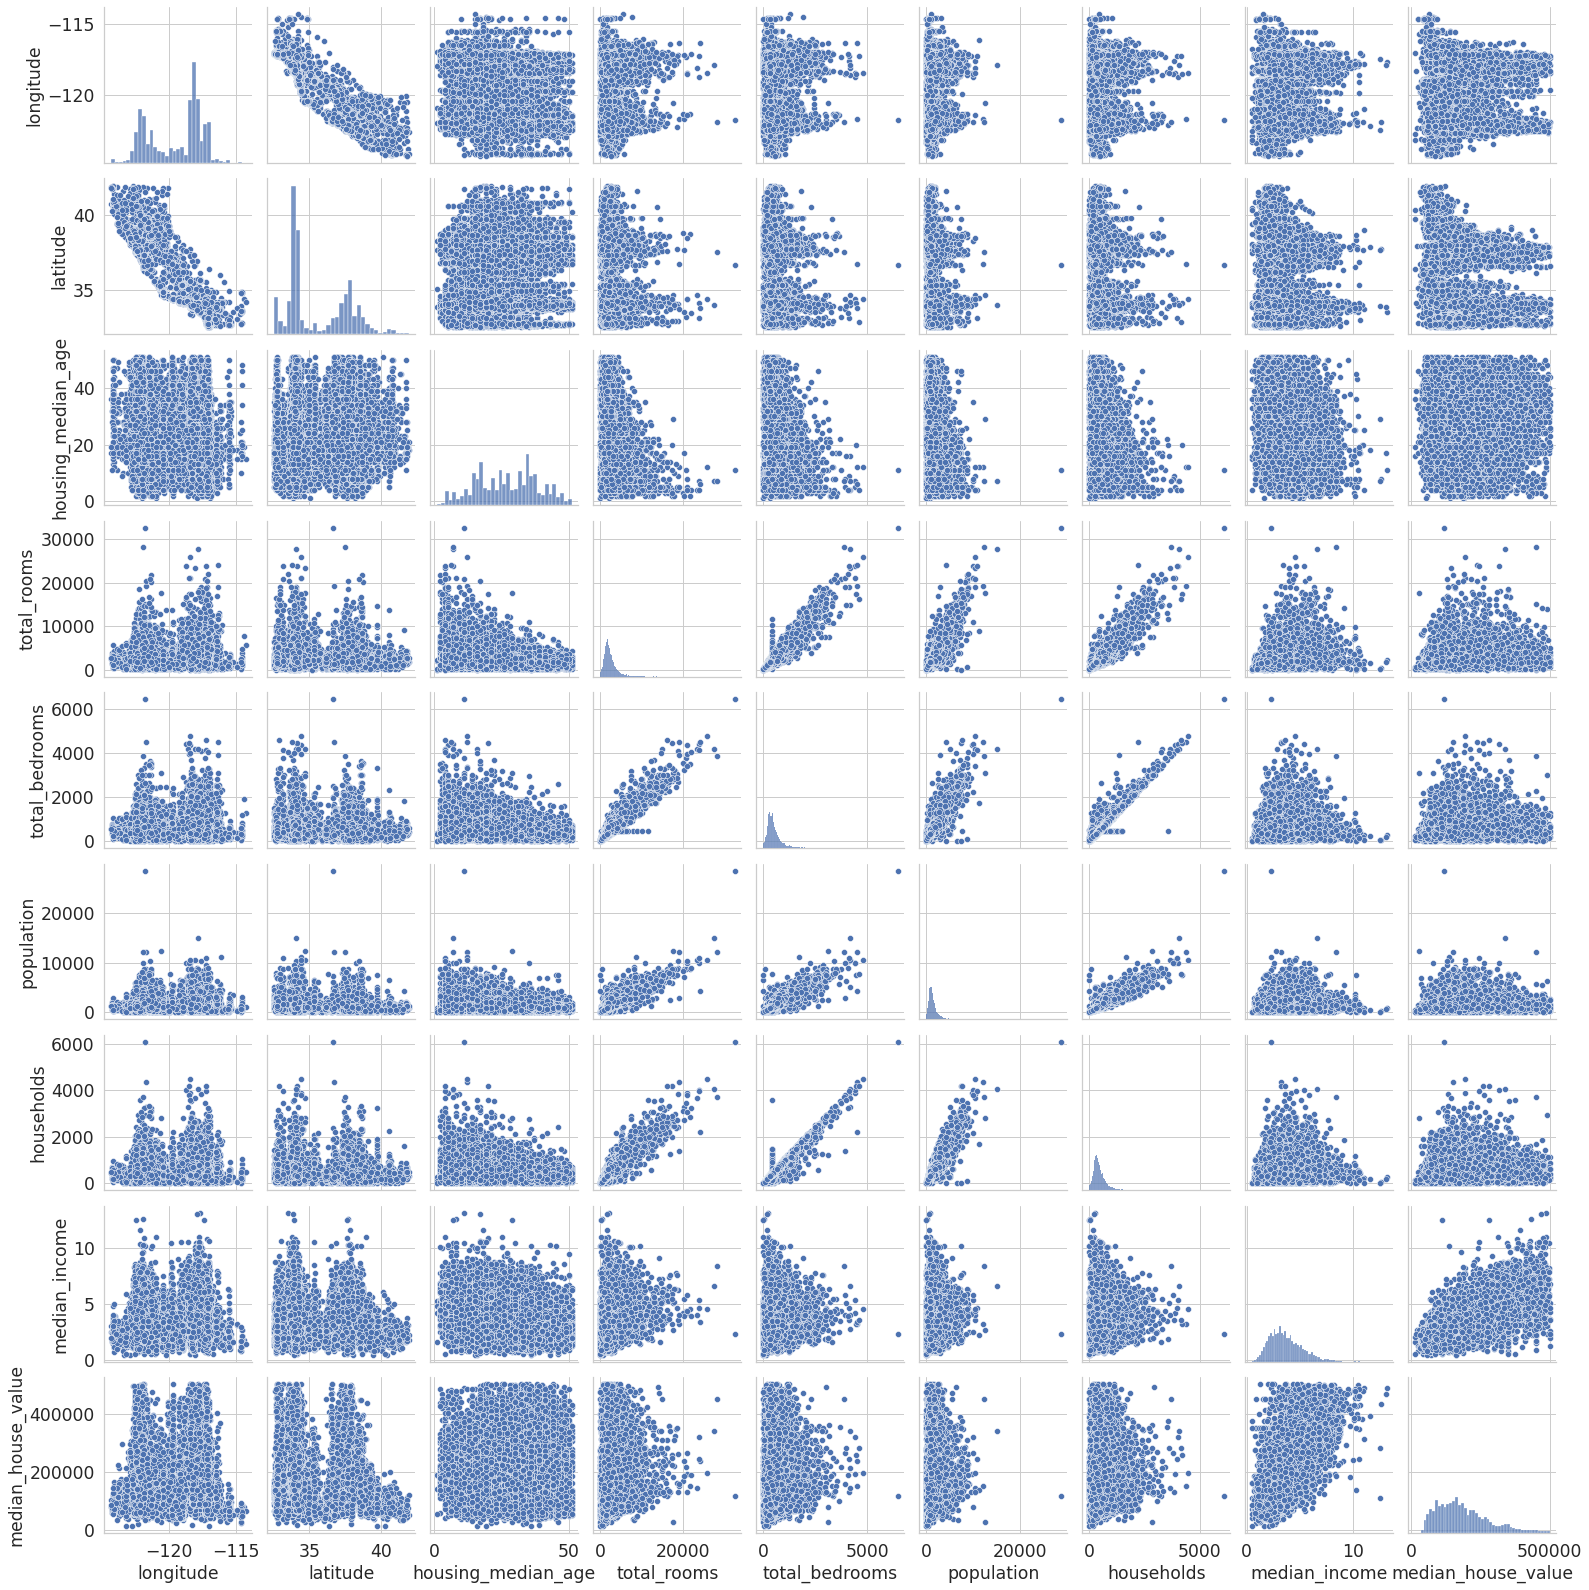

In [34]:
# 9 numeric attributes ==> 9 x 9 = 81 plots
sns.pairplot(data=housing_train_pre)

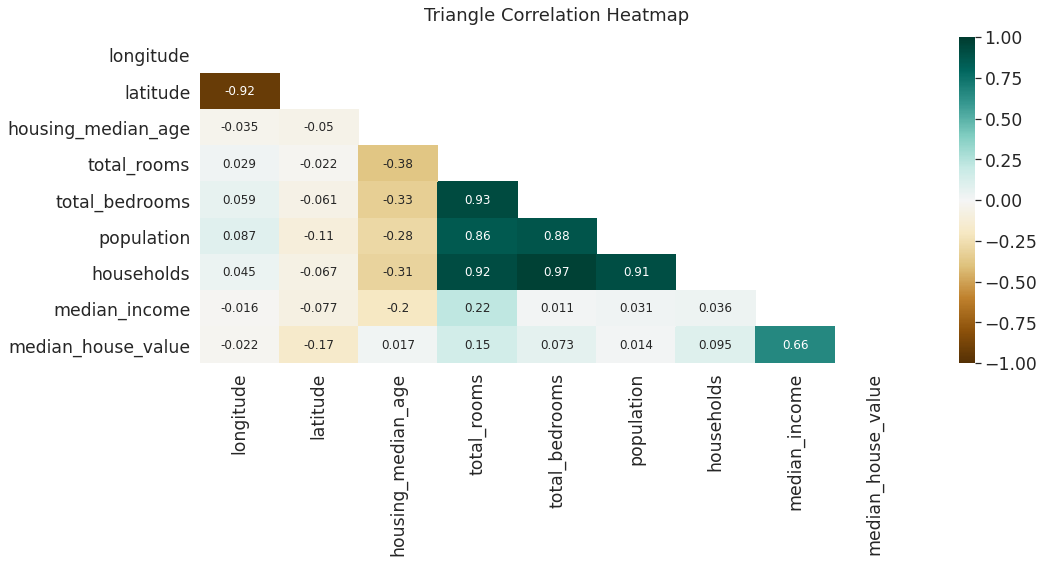

In [36]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(housing_train_pre.corr(), dtype=np.bool))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(housing_train_pre.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

The _most promising attribute_ to predict the `median house value` is the **`median income`**, so let’s zoom in on their correlation scatterplot:

<Figure size 1080x576 with 0 Axes>

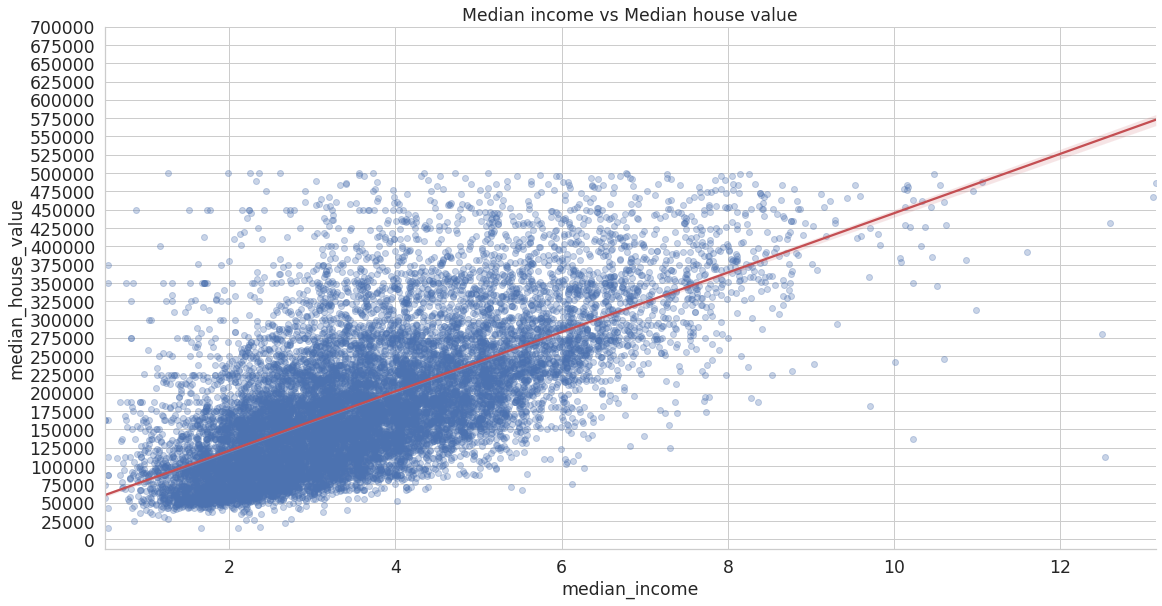

In [37]:
plt.figure(figsize=(15, 8))
sns.lmplot(data=housing_train_pre, x="median_income", y="median_house_value", aspect=2, height=8, scatter_kws={'alpha': 0.3}, line_kws={'color': 'r'})
plt.yticks(range(0, 700001, 25000))
plt.grid(True)
plt.title('Median income vs Median house value')
display()

## 🛠️ 5. Prepare the Data

In [38]:
housing_train_pre.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18502    -121.37     37.06                25.0        474.0            92.0   
4102     -118.39     34.14                19.0       5076.0          1034.0   
18219    -122.07     37.41                26.0       1184.0           225.0   
9797     -121.92     36.57                42.0       3944.0           738.0   
8752     -118.36     33.82                36.0       1083.0           187.0   

       population  households  median_income  median_house_value  \
18502       300.0       104.0         3.8062            340900.0   
4102       2021.0       960.0         5.5683            309200.0   
18219       815.0       218.0         5.7657            322300.0   
9797       1374.0       598.0         4.1740            394400.0   
8752        522.0       187.0         5.7765            339500.0   

      ocean_proximity  
18502          INLAND  
4102        <1H OCEAN  
18219        NEAR BAY  
9797       NEAR OCEAN  
8752        <1H OCEAN

In [39]:
# one hot encoding by pandas
housing_train_pre = pd.get_dummies(data=housing_train_pre, columns=['ocean_proximity'])
housing_train_pre.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18502    -121.37     37.06                25.0        474.0            92.0   
4102     -118.39     34.14                19.0       5076.0          1034.0   
18219    -122.07     37.41                26.0       1184.0           225.0   
9797     -121.92     36.57                42.0       3944.0           738.0   
8752     -118.36     33.82                36.0       1083.0           187.0   

       population  households  median_income  median_house_value  \
18502       300.0       104.0         3.8062            340900.0   
4102       2021.0       960.0         5.5683            309200.0   
18219       815.0       218.0         5.7657            322300.0   
9797       1374.0       598.0         4.1740            394400.0   
8752        522.0       187.0         5.7765            339500.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
18502                          0                       1   
4102                           1                       0   
18219                          0                       0   
9797                           0                       0   
8752                           1                       0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
18502                       0                         0   
4102                        0                         0   
18219                       0                         1   
9797                        0                         0   
8752                        0                         0   

       ocean_proximity_NEAR OCEAN  
18502                           0  
4102                            0  
18219                           0  
9797                            1  
8752                            0

#### **Saving the pre-processed training set**

In [40]:
# if you want to keep the reference for the row indices from the original dataset, remove the index=False
housing_train_pre.to_csv('./datasets/housing_train_pre_sprint_2.csv', index=False)

## 🏋️‍♀️ 6. Train ML Algorithms

### 6.1. Getting the independent (features) and dependent variables (outcome)

In [41]:
X_train = housing_train_pre.drop(labels=['median_house_value'], axis=1)
y_train = housing_train_pre['median_house_value']

### 6.2. Training the Models

In [42]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()  # default parameters
linear_regressor.fit(X_train, y_train)

LinearRegression()

### 6.3. Evaluating on the Training Set

#### **Prediction**

In [43]:
y_train_pred = linear_regressor.predict(X_train)

#### **Metrics**

##### **Coeficiente de Determinação - R²**
The proportion of _variation_ in the dependent variable (outcome) that is explained by the predictor variables (regression, in this case). <br/>
R² can be interpreted as the percent of variance in our dependent variable that can be explained by our model. <br/>
R² checks how much the regression line fits the data

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=0}^{m-1}(y^{(i)}-\bar{y})^2}$$

##### **Root Mean Squared Error (RMSE)**

$$RMSE = \sqrt{MSE} = \sqrt{\frac{\sum_{i=0}^{m-1}(y^{(i)}-\hat{y}^{(i)})^2}{m}}$$

##### **Evaluation**

In [44]:
r2_score = linear_regressor.score(X_train, y_train)
print(f'R² = {r2_score}')

R² = 0.6243118707667812


In [46]:
# RMSE

from sklearn.metrics import mean_absolute_error

rmse = mean_absolute_error(y_train, y_train_pred)
print(f'RMSE = {rmse}')

RMSE = 43079.81863943676


Text(0.5, 1.0, 'Median housing value - Prediction vs Real')

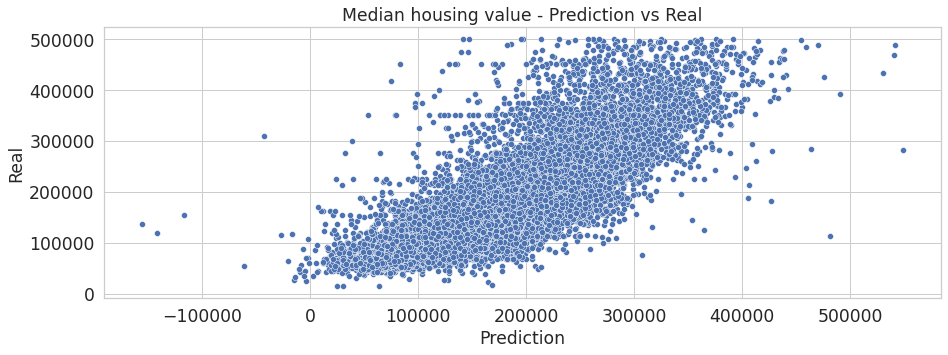

In [47]:
sns.scatterplot(x=y_train_pred, y=y_train)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Median housing value - Prediction vs Real')

In [48]:
residual = y_train - y_train_pred
residual

18502    167916.480402
4102       3998.777132
18219     44549.199975
9797     107094.426267
8752      43880.582609
             ...      
2605     -36895.931486
7289      33807.712843
17669    -59186.368564
16213    -18399.135941
13540      3295.134417
Name: median_house_value, Length: 14857, dtype: float64

In [49]:
residual.describe()

count    1.485700e+04
mean     4.789193e-11
std      5.869109e+04
min     -3.688607e+05
25%     -3.713684e+04
50%     -8.301165e+03
75%      2.645893e+04
max      3.670921e+05
Name: median_house_value, dtype: float64

Text(0.5, 1.0, 'Median housing value - Prediction vs Residual')

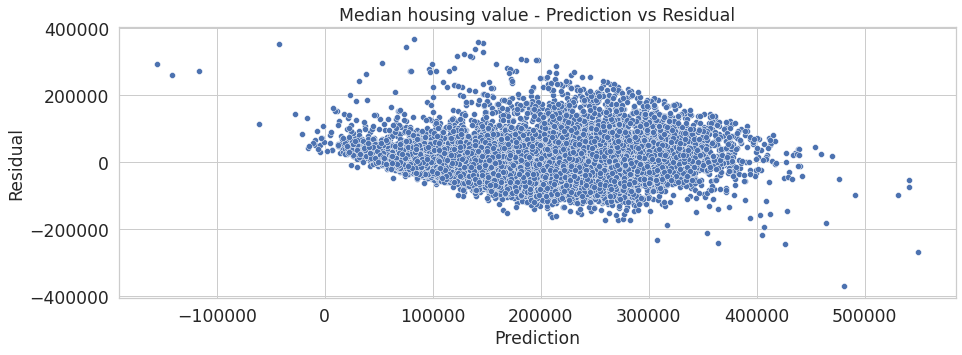

In [50]:
sns.scatterplot(x=y_train_pred, y=residual)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Median housing value - Prediction vs Residual')

# conclusion
This is better than nothing, but clearly not a great score: most districts’ median_hous ing_values range between $120,000 and $265,000, so a typical prediction error of $68,628 is not very satisfying. This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough
information to make good predictions, or that the model is not powerful enough. As we saw in the previous chapter, the main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. This model is not regularized, which rules out the last option. You could try to add more features (e.g., the log of the population), but first let’s try a more complex model to see how it does.